In [1]:
import os
from eazy import filters, utils
from eazy.utils import DATA_PATH
import numpy as np
import eazy
import importlib
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# quiet numpy/astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

In [2]:
field = '53.0_-28.0'
fluxes = pd.read_csv(f'/net/vdesk/data2/deklerk/GAAP_data/{field}/fluxes.csv')

In [3]:
fluxes.insert(0, "id", range(len(fluxes)))

In [4]:
fluxes = fluxes.drop(columns=["aperture_size"])


In [5]:
fluxes

,id,ra,dec,flux_u,flux_u_sigma,flux_g,flux_g_sigma,flux_r,flux_r_sigma,flux_i,...,flux_DES-R,flux_DES-R_sigma,flux_DES-I,flux_DES-I_sigma,flux_NIR-Y,flux_NIR-Y_sigma,flux_NIR-J,flux_NIR-J_sigma,flux_NIR-H,flux_NIR-H_sigma
0,0,53.157185,-28.254257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.222355,2.948168,66.962409,5.346565,78.519428,7.350121,158.481705,6.411058,194.220603,7.024942
1,1,52.816362,-28.254012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.331618,2.948168,69.108516,5.346565,176.757705,7.350121,61.973429,6.411058,85.576415,7.024942
2,2,52.707227,-28.253847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-29.401046,2.948168,-24.870498,5.346565,0.375568,7.350121,15.327030,6.411058,-157.172155,7.024942
3,3,52.761280,-28.253924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,258.009601,2.948168,242.946529,5.346565,394.063282,7.350121,553.715611,6.411058,764.871264,7.024942
4,4,53.233772,-28.253921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,117.379355,2.948168,183.507884,5.346565,140.401328,7.350121,238.232517,6.411058,290.876150,7.024942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96159,96159,52.762204,-27.748261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-8.723111,2.948168,-13.575615,5.346565,4.300852,7.350121,-39.098364,6.411058,35.287887,7.024942
96160,96160,53.002813,-27.748525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.993338,2.948168,-30.719209,5.346565,-0.576466,7.350121,21.006070,6.411058,69.812149,7.024942
96161,96161,53.002641,-27.748209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.140499,2.948168,25.219831,5.346565,17.160714,7.350121,15.682976,6.411058,42.473975,7.024942
96162,96162,52.751111,-27.748058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-13.851874,2.948168,-40.318471,5.346565,127.151418,7.350121,207.869101,6.411058,151.936352,7.024942


In [6]:
for col in fluxes.columns:
    fluxes[np.isnan(fluxes[col])] = -99
    if col.endswith('a'):

        # For translate file
        print('{} E00'.format(col))
    else:
        print('{} F00'.format(col))

id F00
ra E00
dec F00
flux_u F00
flux_u_sigma E00
flux_g F00
flux_g_sigma E00
flux_r F00
flux_r_sigma E00
flux_i F00
flux_i_sigma E00
flux_z F00
flux_z_sigma E00
flux_y F00
flux_y_sigma E00
flux_VIS F00
flux_VIS_sigma E00
flux_DES-G F00
flux_DES-G_sigma E00
flux_DES-R F00
flux_DES-R_sigma E00
flux_DES-I F00
flux_DES-I_sigma E00
flux_NIR-Y F00
flux_NIR-Y_sigma E00
flux_NIR-J F00
flux_NIR-J_sigma E00
flux_NIR-H F00
flux_NIR-H_sigma E00


In [7]:
from astropy.table import Table

table = Table.from_pandas(fluxes)
table.write(
    "prepared_flux.cat",
    format="ascii.commented_header",
    overwrite=True
)

In [8]:
trans = """id id
flux_u F419
flux_u_sigma E419
flux_g F420
flux_g_sigma E420
flux_r F421
flux_r_sigma E421
flux_i F422
flux_i_sigma E422
flux_z F423
flux_z_sigma E423
flux_y F424
flux_y_sigma E424
flux_VIS F410
flux_VIS_sigma E410
flux_DES-G F420
flux_DES-G_sigma E420
flux_DES-R F421
flux_DES-R_sigma E421
flux_DES-I F422
flux_DES-I_sigma E422
flux_NIR-Y F411
flux_NIR-Y_sigma E411
flux_NIR-J F412
flux_NIR-J_sigma E412
flux_NIR-H F413
flux_NIR-H_sigma E413"""
fp = open('zphot.translate.gdss','w')
fp.write(trans)
fp.close()

In [9]:
print(DATA_PATH)
params = {}
params['CATALOG_FILE'] = 'prepared_flux.cat'

params['MAIN_OUTPUT_FILE'] = 'test.eazypy'

# Galactic extinction
params['MW_EBV'] = 0.0103
params['CAT_HAS_EXTCORR'] = True

params['Z_STEP'] = 0.01
params['Z_MAX'] = 6.

params['PRIOR_ABZP'] = 25
params['PRIOR_FILTER'] = 410 # K
params['VERBOSITY'] = 1
params['PRIOR_FILE'] = os.path.join(DATA_PATH, 'templates/prior_K_TAO.dat')

params['TEMPLATES_FILE'] = os.path.join(DATA_PATH, 'templates/fsps_full/tweak_fsps_QSF_12_v3.param')


params['IGM_SCALE_TAU'] = 1.0

translate_file = 'zphot.translate.gdss'

/net/vdesk/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/eazy/data/eazy-photoz


In [10]:
from eazy.photoz import PhotoZ

self = PhotoZ(
    param_file=None,
    translate_file=translate_file,
    zeropoint_file=None,
    params=params,
    load_prior=False,
    load_products=False
)

Read default param file: /net/vdesk/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: prepared_flux.cat
   >>> NOBJ = 96164
flux_u flux_u_sigma (419): lsst_total_u.dat
flux_g flux_g_sigma (420): lsst_total_g.dat
flux_r flux_r_sigma (421): lsst_total_r.dat
flux_i flux_i_sigma (422): lsst_total_i.dat
flux_z flux_z_sigma (423): lsst_total_z.dat
flux_y flux_y_sigma (424): lsst_total_y.dat
flux_VIS flux_VIS_sigma (410): Euclid_VIS.vis.dat
flux_DES-G flux_g_sigma (420): lsst_total_g.dat
flux_DES-R flux_r_sigma (421): lsst_total_r.dat
flux_DES-I flux_i_sigma (422): lsst_total_i.dat
flux_NIR-Y flux_NIR-Y_sigma (411): Euclid_NISP.Y.dat
flux_NIR-J flux_NIR-J_sigma (412): Euclid_NISP.J.dat
flux_NIR-H flux_NIR-H_sigma (413): Euclid_NISP.H.dat
Set sys_err = 0.01 (positive=True)
Template grid: /net/vdesk/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/eazy/data/eazy-photoz/templates/fsps_full/tweak_fsps_QSF_12_v3.param (this ma

100%|██████████| 12/12 [00:05<00:00,  2.28it/s]


Template   0: tweak_fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: tweak_fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: tweak_fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: tweak_fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: tweak_fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: tweak_fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: tweak_fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: tweak_fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: tweak_fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: tweak_fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: tweak_fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: tweak_fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 5.570 s


194it [00:03, 59.15it/s]


Iteration:  0


100%|██████████| 194/194 [00:57<00:00,  3.40it/s]


Compute best fits
fit_best: 1.6 s (n_proc=1,  NOBJ=13106)
Fit 59.1 s (n_proc=4, NOBJ=13612)
Iterative correction - zeropoint / template


/net/vdesk/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/net/vdesk/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


Iteration:  1


100%|██████████| 194/194 [00:55<00:00,  3.52it/s]


Compute best fits
fit_best: 1.6 s (n_proc=1,  NOBJ=13099)
Fit 57.2 s (n_proc=4, NOBJ=13612)
Iterative correction - zeropoint / template


/net/vdesk/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


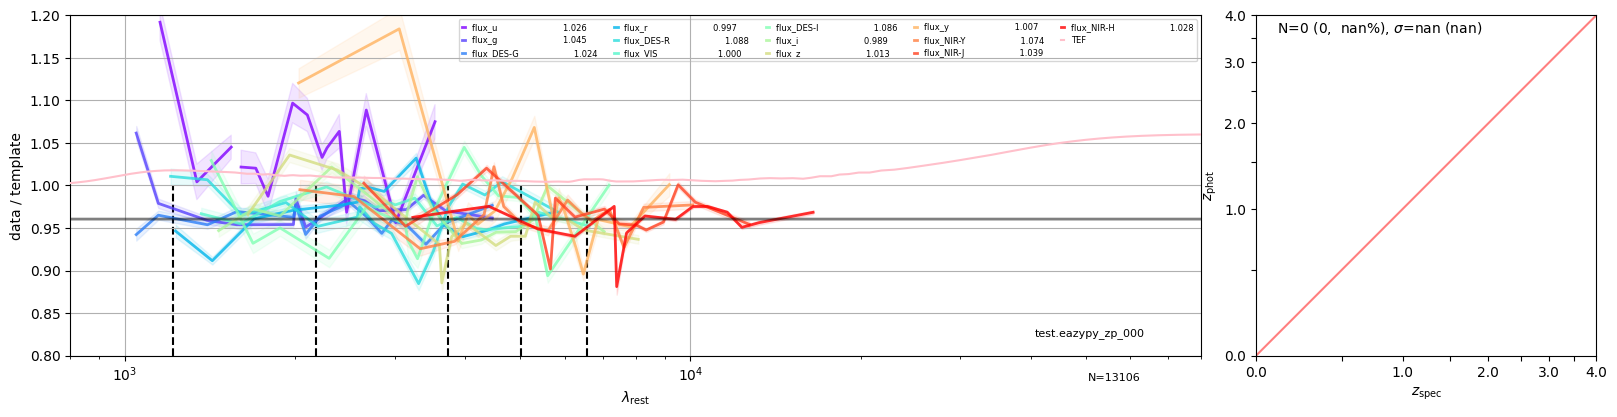

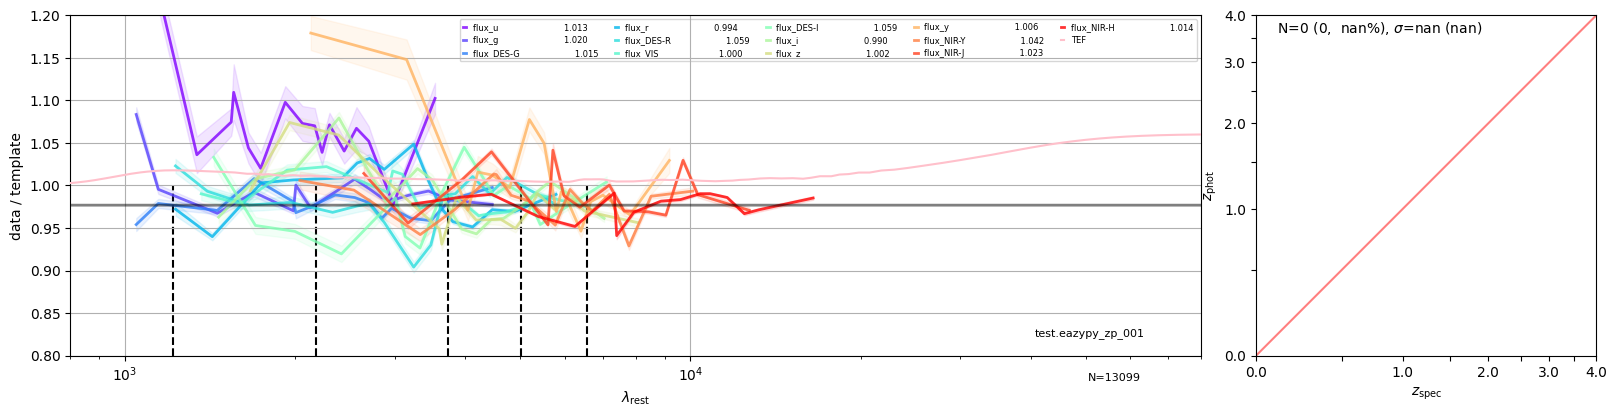

In [11]:
NITER = 2
NBIN = np.minimum(self.NOBJ//100, 180)

self.param.params['VERBOSITY'] = 1.
for iter_ in range(NITER):
    print('Iteration: ', iter_)

    sn = self.fnu/self.efnu
    clip = (sn > 1).sum(axis=1) > 4 # Generally make this higher to ensure reasonable fits

    self.iterate_zp_templates(
        idx=self.idx[clip],
        update_templates=False, # (iter_ > 0),
        update_zeropoints=True,
        iter=iter_,
        n_proc=4,
        save_templates=False,
        error_residuals=False,
        NBIN=NBIN,
        get_spatial_offset=False
    )

In [12]:
# Turn off error corrections derived above
self.set_sys_err(positive=True)

# Full catalog
sample = np.isfinite(self.ZSPEC)

# fit_parallel renamed to fit_catalog 14 May 2021
self.fit_catalog(self.idx[sample], n_proc=4)

Set sys_err = 0.01 (positive=True)


  0%|          | 0/194 [00:00<?, ?it/s]

100%|██████████| 194/194 [01:17<00:00,  2.51it/s]


Compute best fits
fit_best: 1.8 s (n_proc=1,  NOBJ=13268)
Fit 79.5 s (n_proc=4, NOBJ=96164)


In [13]:
# Derived parameters (z params, RF colors, masses, SFR, etc.)
warnings.simplefilter('ignore', category=RuntimeWarning)

zout, hdu = self.standard_output(
    simple=False,
    rf_pad_width=0.5,
    rf_max_err=2,
    prior=True,
    beta_prior=True,
    absmag_filters=[],
    extra_rf_filters=[]
)

Get best fit coeffs & best redshifts
fit_best: 6.6 s (n_proc=1,  NOBJ=13248)
Get parameters (UBVJ=[153, 154, 155, 161], simple=False)


100%|██████████| 13248/13248 [01:17<00:00, 170.37it/s]


In [26]:
# Outputs for the z=1 catalog
zout['ssfr'] = zout['sfr']/zout['mass']
print(zout.colnames)

['id', 'ra', 'dec', 'nusefilt', 'z_ml', 'z_ml_chi2', 'z_ml_risk', 'lc_min', 'lc_max', 'z_phot', 'z_phot_chi2', 'z_phot_risk', 'z_min_risk', 'min_risk', 'z_raw_chi2', 'raw_chi2', 'z025', 'z160', 'z500', 'z840', 'z975', 'restU', 'restU_err', 'restB', 'restB_err', 'restV', 'restV_err', 'restJ', 'restJ_err', 'dL', 'Lv', 'mass', 'sfr', 'LIR', 'energy_abs', 'Av', 'lw_age_V', 'MLv', 'Lv_p', 'mass_p', 'LIR_p', 'sfr_p', 'Av_p', 'ssfr_p', 'ssfr']


Text(0, 0.5, '$(U-V)_0$')

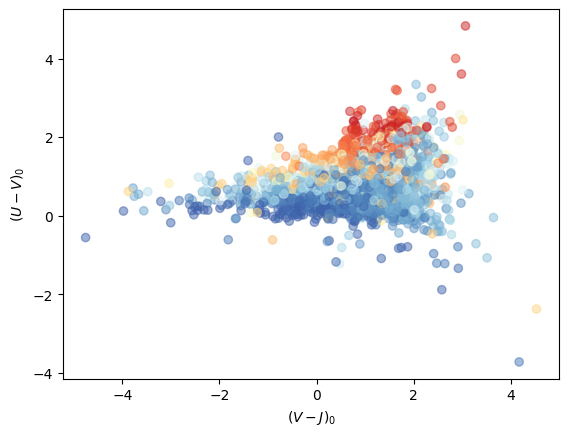

In [17]:
# Show UVJ diagram
uv = -2.5*np.log10(zout['restU']/zout['restV'])
vj = -2.5*np.log10(zout['restV']/zout['restJ'])
ssfr = zout['sfr']/zout['mass']

sel = (zout['z_phot'] > 0.2) & (zout['z_phot'] < 1)
plt.scatter(vj[sel], uv[sel], c=np.log10(ssfr)[sel],
            vmin=-13, vmax=-8, alpha=0.5, cmap='RdYlBu')

# plt.xlim(-0.2, 2.3); plt.ylim(0, 2.4); plt.grid()
plt.xlabel(r'$(V-J)_0$'); plt.ylabel(r'$(U-V)_0$')

In [28]:
uv = -2.5*np.log10(zout['restU']/zout['restV'])
vj = -2.5*np.log10(zout['restV']/zout['restJ'])

uverr = 2.5*np.sqrt((zout['restU_err']/zout['restU'])**2+(zout['restV_err']/zout['restV'])**2)
vjerr = 2.5*np.sqrt((zout['restV_err']/zout['restV'])**2+(zout['restJ_err']/zout['restJ'])**2)

/var/tmp/deklerk/ipykernel_282022/853212967.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.1)


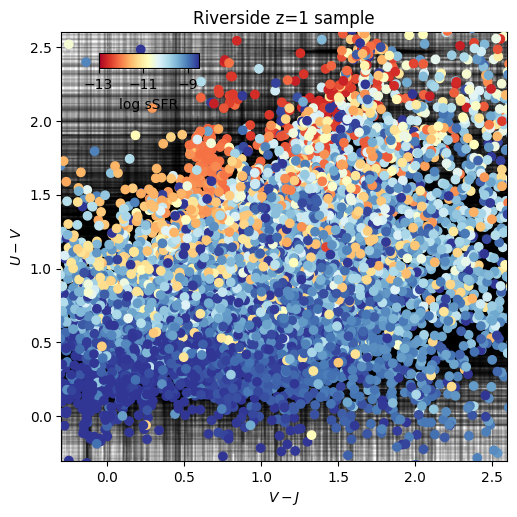

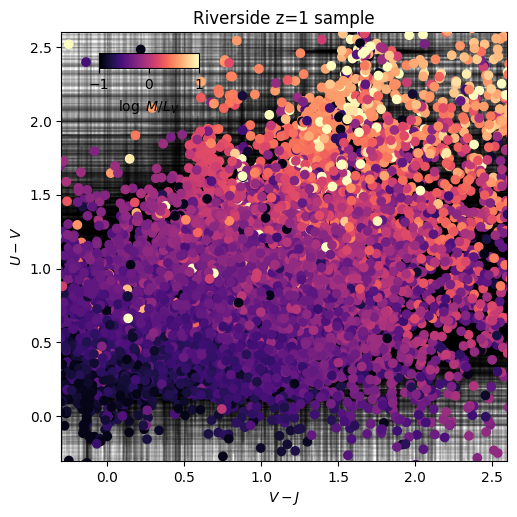

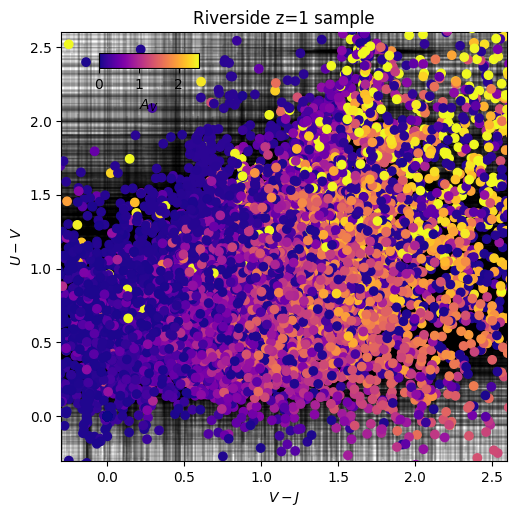

In [29]:
for show in ['ssfr', 'MLv', 'Av']:
    
    fig = plt.figure(figsize=[5,5])
    
    ax = fig.add_subplot(111)
    ax.errorbar(vj, uv, xerr=vjerr, yerr=uverr, color='k', 
                alpha=0.1, marker='.', capsize=0, linestyle='None')
    
    if show == 'ssfr':
        sc = ax.scatter(vj, uv, c=np.log10(zout['ssfr']), 
                        vmin=-13, vmax=-8.5, zorder=10, cmap='RdYlBu')
        label = 'log sSFR'
        ticks = np.arange(-13,-8,2)
    
    elif show == 'MLv':
        sc = ax.scatter(vj, uv, c=np.log10(zout['MLv']), 
                        vmin=-1, vmax=1, zorder=10, cmap='magma')
        label = r'$\log\ M/L_V$'
        ticks = np.arange(-1,1.1,1)

    elif show == 'Av':
        sc = ax.scatter(vj, uv, c=zout['Av'], vmin=0, 
                        vmax=2.5, zorder=10, cmap='plasma')
        label = r'$A_V$'
        ticks = np.arange(0,2.1,1)
    
    # Colorbar
    cax = fig.add_axes((0.18, 0.88, 0.2, 0.03))
    cb = plt.colorbar(sc, cax=cax, orientation='horizontal')
    cb.set_label(label)
    cb.set_ticks(ticks)
    
    ax.set_xlim(-0.3, 2.6)
    ax.set_ylim(-0.3, 2.6)
    
    ax.grid()
    
    ax.set_xlabel(r'$V-J$'); ax.set_ylabel(r'$U-V$')
    ax.set_title('Riverside z=1 sample')
    
    fig.tight_layout(pad=0.1)


In [23]:
print(fluxes[fluxes['flux_u'] > 0])

          id         ra        dec     flux_u  flux_u_sigma     flux_g  \
31228  31228  53.096905 -28.031688  10.580648      9.946942  19.670349   
31231  31231  53.073332 -28.031691  26.780230      9.946942  17.028916   
31236  31236  53.077119 -28.031667  13.571228      9.946942   4.293573   
31242  31242  52.992508 -28.031647  37.309760      9.946942  27.734569   
31244  31244  53.008342 -28.031650  54.661351      9.946942  59.912372   
...      ...        ...        ...        ...           ...        ...   
92293  92293  52.961384 -27.843034  35.331109      9.946942  23.317836   
92296  92296  52.969292 -27.842915  28.448778      9.946942  13.251346   
92297  92297  53.005675 -27.842908  38.742074      9.946942  17.438154   
92301  92301  52.906250 -27.842793  19.419549      9.946942  12.854931   
92305  92305  52.957895 -27.842766  20.011850      9.946942   3.089789   

       flux_g_sigma     flux_r  flux_r_sigma      flux_i  ...  flux_DES-R  \
31228      1.578213  19.955038    

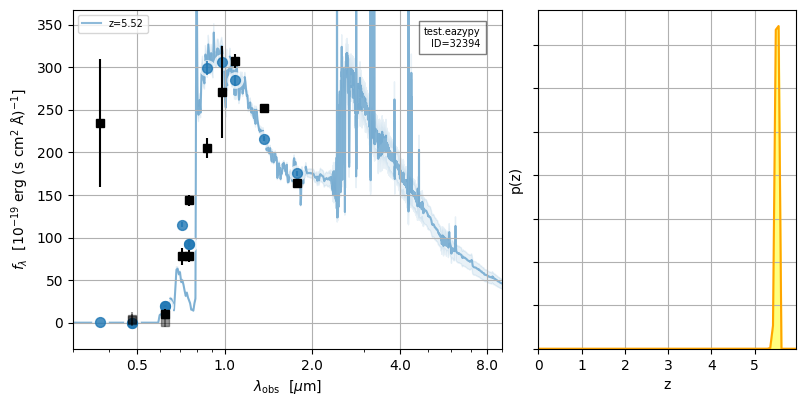

In [38]:
# Show SED
id_i = self.cat['id'][32394]
fig = self.show_fit(id_i, show_fnu=0)

/var/tmp/deklerk/ipykernel_282022/3911656476.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig[0].axes[0].set_xticklabels([0.1, 1, 10, 100, 1000])


(0.0, 8.0)

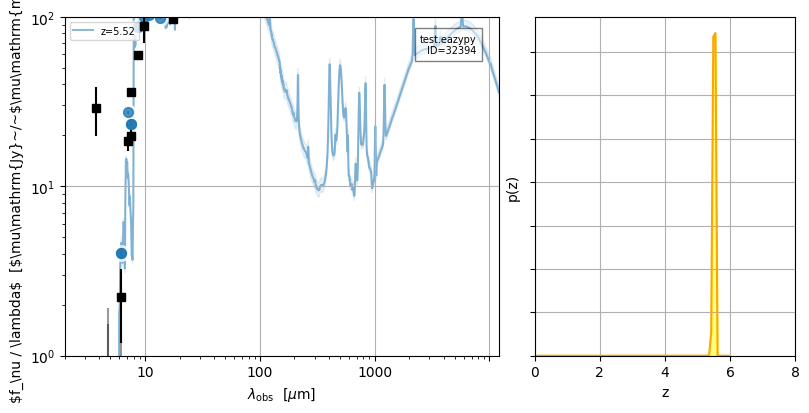

In [40]:
# nu-Fnu scaling for far-IR 
fig = self.show_fit(id_i, show_fnu=2)

fig[0].axes[0].set_xlim(0.2, 1200)
fig[0].axes[0].set_ylim(1, 100)
fig[0].axes[0].loglog()
fig[0].axes[0].set_xticklabels([0.1, 1, 10, 100, 1000])
fig[0].axes[1].set_xlim(0, 8)

  id 
-----
32394
35482
38171
38307
38498
38568
38752
39358
39364
39684
  ...
92074
92081
92084
92092
92097
92107
92118
92191
92193
92284
Length = 253 rows


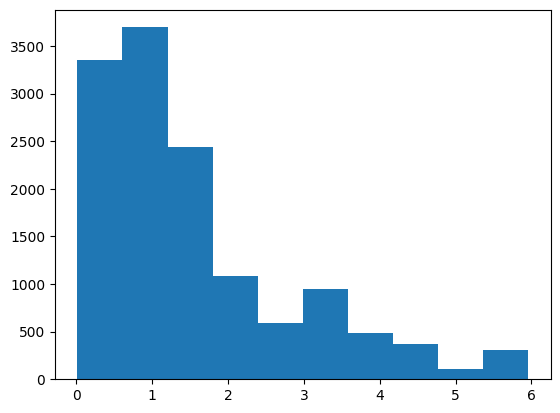

In [37]:
plt.hist(zout['z_phot'][zout['z_phot']>0])
print(zout['id'][zout['z_phot']>5.5])